In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pygame as pg
import keras
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D
import matplotlib.image as mpimg
import cv2

pygame 2.0.0 (SDL 2.0.12, python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


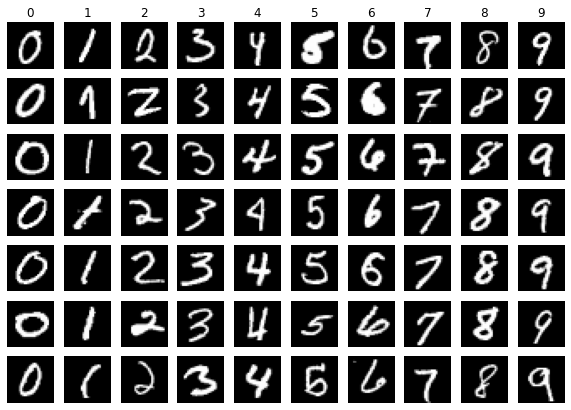

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

def plot_MNIST_samples(image_data, label_data, classes,  N=8):
    plt.figure(figsize=(10,N))
    num_classes = len(classes)
    for i, y in enumerate(classes):
        idxs = np.flatnonzero(label_data == y)
        idxs = np.random.choice(idxs, N, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(N, num_classes, plt_idx)
            plt.imshow(image_data[idx], cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(str(y))
    plt.show()
    
classes = list(range(0,10))
plot_MNIST_samples(X_train, y_train, classes, N=7)

In [3]:
X_train = X_train / 255 
X_test = X_test / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
X_train, X_test = X_train.reshape((60000, 28, 28, 1)), X_test.reshape((10000, 28, 28, 1))
input_size = X_train[0].shape
conv_model = Sequential()
conv_model.add(Conv2D(24, (3, 3), padding='same', input_shape=input_size))
conv_model.add(Activation('relu'))
conv_model.add(Flatten())
conv_model.add(Dense(64, activation='relu'))
conv_model.add(Dense(10, activation='softmax'))
conv_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 24)        240       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 24)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18816)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1204288   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 1,205,178
Trainable params: 1,205,178
Non-trainable params: 0
_________________________________________________________________


In [4]:
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2895 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0513 - accuracy: 0.9830
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0285 - accuracy: 0.9913
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0170 - accuracy: 0.9947
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0126 - accuracy: 0.9956


In [7]:
import random
import pygame as pg

def get_prediction():
    img = mpimg.imread('picture.png')[..., 1]
    img = cv2.resize(img, dsize=(28, 28))
    img = np.array(img).reshape(1, 28,28,1)
    
    pred = conv_model.predict(img)
    return np.argmax(pred, axis=1)[0]
def airbrush():
    airbrush = True
    cur = pg.mouse.get_pos()
    click = pg.mouse.get_pressed()
    if click[0] == True: 
        pg.draw.circle(sc, WHITE, (cur[0] + random.randrange(2), cur[1] + random.randrange(2)), random.randrange(1, 5))
        
pg.init()
sc = pg.display.set_mode((400, 400))
WHITE = (255, 255, 255)
BLACK = (0,0,0)
RED = (255,0,0)
sc.fill(BLACK)
pg.display.update()
f1 = pg.font.Font(None, 36)

play = True
while play:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            pg.quit()
            play = False
        if i.type == pg.MOUSEBUTTONDOWN:
            if i.button == 3:
                pg.image.save(sc, 'picture.png')
                dog_surf = pg.image.load('picture.png')
                pred = get_prediction()
                text1 = f1.render('Предсказанная цифра: {0}'.format(pred), True, RED)
                sc.blit(text1, (10, 10))
                pg.display.update()
                pg.image.save(sc, 'picture_result.png')
                dog_surf = pg.image.load('picture_result.png')
        if i.type == pg.KEYDOWN and i.key == pg.K_SPACE:
            sc.fill(BLACK)
            pg.display.update()
    if play:
        airbrush()
        pg.display.update()

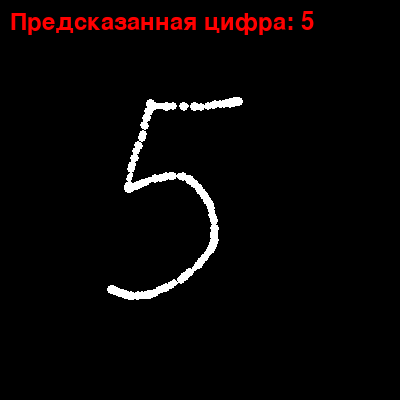

In [8]:
from IPython.display import Image
Image("picture_result.png")